# Numerical Differentiation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Derivative

The [derivative](https://en.wikipedia.org/wiki/Derivative) of a function $f(x)$ at $x=a$ is the limit

$$
f'(a) = \lim_{h \to 0} \frac{f(a+h) - f(a)}{h}
$$

## Difference Formulas

There are 3 main [difference formulas](https://en.wikipedia.org/wiki/Finite_difference#Forward,_backward,_and_central_differences) for numerically approximating derivatives.

The *forward difference formula* with step size $h$ is

$$
f'(a) \approx \frac{f(a + h) - f(a)}{h}
$$

The *backward difference formula* with step size $h$ is

$$
f'(a) \approx \frac{f(a) - f(a - h)}{h}
$$

The *central difference formula* with step size $h$ is the average of the forward and backwards difference formulas

$$
f'(a) \approx \frac{1}{2} \left( \frac{f(a + h) - f(a)}{h} + \frac{f(a) - f(a - h)}{h} \right) = \frac{f(a + h) - f(a - h)}{2h}
$$

## Implementation

Let's write a function called `derivative` which takes input parameters `f`, `a`, `method` and `h` (with default values `method='central'` and `h=0.01`) and returns the corresponding difference formula for $f'(a)$ with step size $h$.

In [2]:
def derivative(f,a,method='central',h=0.01):
    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a : number
        Compute derivative at x = a
    method : string
        Difference formula: 'forward', 'backward' or 'central'
    h : number
        Step size in difference formula

    Returns
    -------
    float
        Difference formula:
            central: f(a+h) - f(a-h))/2h
            forward: f(a+h) - f(a))/h
            backward: f(a) - f(a-h))/h            
    '''
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

Let's test our function on some simple functions. For example, we know

$$
\left. \frac{d}{dx} \left( \cos x \right) \, \right|_{x=0} = -\sin(0) = 0
$$

and we compute

In [3]:
derivative(np.cos,0)

0.0

In [4]:
derivative(np.cos,0,method='forward',h=1e-8)

0.0

We also know

$$
\left. \frac{d}{dx} \left( e^x \right) \, \right|_{x=0} = e^0 = 1
$$

and we compute

In [5]:
derivative(np.exp,0,h=0.0001)

1.0000000016668897

In [6]:
derivative(np.exp,0,method='backward',h=0.0001)

0.9999500016666385

Notice that our function can take an array of inputs for $a$ and return the derivatives for each $a$ value. For example, we can plot the derivative of $\sin(x)$:

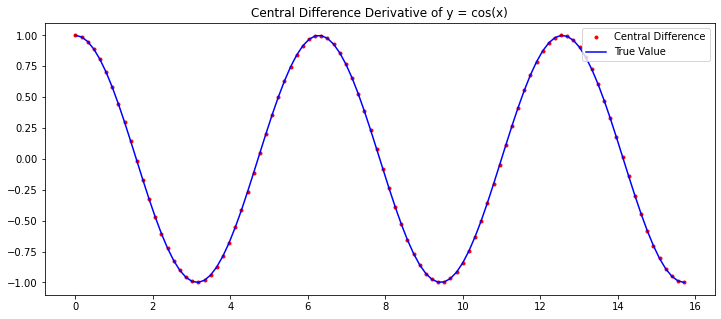

In [7]:
x = np.linspace(0,5*np.pi,100)
dydx = derivative(np.sin,x)

dYdx = np.cos(x)

plt.figure(figsize=(12,5))
plt.plot(x,dydx,'r.',label='Central Difference')
plt.plot(x,dYdx,'b',label='True Value')

plt.title('Central Difference Derivative of y = cos(x)')
plt.legend(loc='best')
plt.show()

Let's compute and plot the derivative of a complicated function

$$
y=\left(\frac{4x^2+2x+1}{x+2e^x}\right)^x
$$

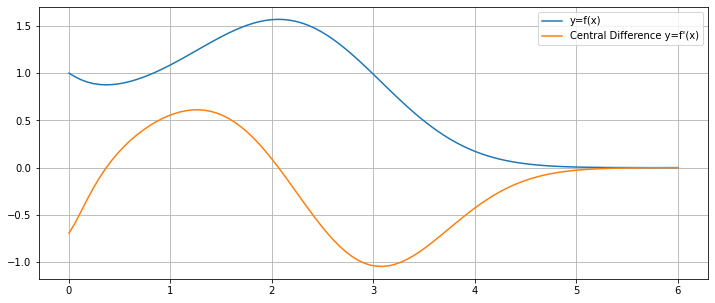

In [8]:
x = np.linspace(0,6,100)
f = lambda x: ((4*x**2 + 2*x + 1)/(x + 2*np.exp(x)))**x
y = f(x)
dydx = derivative(f,x)

plt.figure(figsize=(12,5))
plt.plot(x,y,label='y=f(x)')
plt.plot(x,dydx,label="Central Difference y=f'(x)")
plt.legend()
plt.grid(True)

plt.show()

## Error Formulas
    
Natural questions arise: how good are the approximations given by the forward, backwards and central difference formulas? We derive the error formulas from [Taylor's Theorem](https://en.wikipedia.org/wiki/Taylor%27s_theorem).

---

**Theorem.** The degree $n$ Taylor polynomial of $f(x)$ at $x=a$ with remainder term is

$$
f(x) = f(a) + f'(a)(x - a) + \frac{f''(a)}{2}(x-a)^2 + \cdots + \frac{f^{(n)}(a)}{n!}(x-a)^n + \frac{f^{(n+1)}(c)}{(n+1)!}(x-a)^{n+1}
$$

for some value $c$ between $x$ and $a$.

---

**Theorem.** The forward difference formula error is

$$
\left| \, \frac{f(a+h) - f(a)}{h} - f'(a) \, \right| \leq \frac{hK_2}{2}
$$

where $\left| \, f''(x) \, \right| \leq K_2$ for all $x \in [a,a+h]$. The same error fomula holds for the backward difference formula.

*Proof*. Look at the degree 1 Taylor formula:

$$
f(x) = f(a) + f'(a)(x-a) + \frac{f''(c)}{2}(x-a)^{2}
$$

Let $x = a+h$ and manipulate the formula

\begin{align}
f(a+h) &= f(a) + f'(a)h + \frac{f''(c)}{2}h^{2} \\\
f(a+h) - f(a) &= f'(a)h + \frac{f''(c)}{2}h^{2} \\\
\frac{f(a+h) - f(a)}{h} &= f'(a) + \frac{f''(c)}{2}h \\\
\frac{f(a+h) - f(a)}{h} - f'(a) &= \frac{f''(c)}{2}h
\end{align}

Let $K_2$ such that $\left| \, f''(x) \, \right| \leq K_2$ for all $x \in [a,a+h]$ and we see the result.

---

**Theorem.** The central difference formula error is:

$$
\left| \frac{f(a+h) - f(a-h)}{2h} - f'(a) \right| \leq \frac{h^2K_3}{6}
$$

where $|f'''(x)| \leq K_3$ for all $x \in [a-h,a+h]$.

*Proof*. Look at the Taylor polynomial of degree 2:

$$
f(x) = f(a) + f'(a)(x-a) + \frac{f''(a)}{2}(x-a)^2 + \frac{f'''(c)}{6}(x-a)^{3}
$$

Let $x = a + h$ and also $x = a - h$ and write:

\begin{align}
f(a+h) &= f(a) + f'(a)h + \frac{f''(a)}{2}h^2 + \frac{f'''(c_1)}{6}h^{3} \\\
f(a-h) &= f(a) - f'(a)h + \frac{f''(a)}{2}h^2 - \frac{f'''(c_2)}{6}h^{3} \\\
f(a+h) - f(a-h) &= 2 f'(a)h + \frac{f'''(c_1)}{6}h^{3} + \frac{f'''(c_2)}{6}h^{3} \\\
\frac{f(a+h) - f(a-h)}{2h} - f'(a) &= \frac{f'''(c_1) + f'''(c_2)}{12}h^{2}
\end{align}

Notice that $f'''(x)$ is continuous (by assumption) and $(f'''(c_1) + f'''(c_2))/2$ is between $f'''(c_1)$ and $f'''(c_2)$ and so there exists some $c$ between $c_1$ and $c_2$ such that

$$
f'''(c) = \frac{f'''(c_1) + f'''(c_2)}{2}
$$

by the Intermediate Value Theorem. Let $K_3$ such that $\left| \, f'''(x) \, \right| \leq K_3$ for all $x \in [a-h,a+h]$ and we see the result.

---

## scipy.misc.derivative

The [SciPy](https://scipy.org/) function `scipy.misc.derivative` computes derivatives using the central difference formula.

In [9]:
from scipy.misc import derivative

In [10]:
x = np.arange(0,5)
derivative(np.exp,x,dx=0.1)

array([ 1.0016675 ,  2.72281456,  7.40137735, 20.11902956, 54.68919246])

## Higher Order Derivatives

*Under construction*

## Examples

### Taylor series

Let's plot the Taylor polynomial $T_3(x)$ of degree 3 centered at $x=0$ for $f(x) = \frac{3e^x}{x^2 + x + 1}$ over the interval $x \in [-3,3]$. First, let's plot the graph $y=f(x)$:

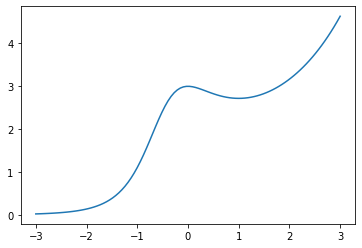

In [11]:
x = np.linspace(-3,3,100)
f = lambda x: 3*np.exp(x) / (x**2 + x + 1)
y = f(x)
plt.plot(x,y);
plt.show()

Let's compute the coefficients $a_n = \frac{f^{(n)}(0)}{n!}$ for $n=0,1,2,3$:

In [12]:
a0 = f(0)
a1 = derivative(f,0,dx=0.001,n=1)
a2 = derivative(f,0,dx=0.001,n=2) / 2
a3 = derivative(f,0,dx=0.001,n=3,order=5) / 6
# The parameter order specifies the number of points to use
# The value order must be odd and at least n + 1

print(a0,a1,a2,a3)

3.0 1.9999983891239026e-06 -1.50000037502096 1.9999920608526622


Finally, let's plot $f(x)$ and $T_3(x)$ together:

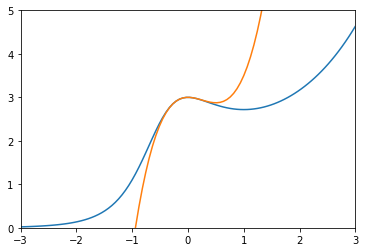

In [13]:
T3 = a0 + a1*x + a2*x**2 + a3*x**3
plt.plot(x,y,x,T3), plt.xlim([-3,3]), plt.ylim([0,5]);
plt.show()

### Arc length

Write a function called `arc_length` which takes parameters `f`, `a`, `b` and `N` and returns an approximation of the arc length of $f(x)$ from $a$ to $b$

$$
L \approx \int_a^b \sqrt{ 1 + \left( f'(x) \right)^2 } dx
$$

The function uses the trapezoid rule (`scipy.integrate.trapz`) to estimate the integral using $N+1$ equally spaced points from $a$ to $b$ (with default value $N=100$), and the central difference formula to approximate $f'(x)$ with step size $h=(b-a)/N$. Note that we can't use the central difference formula at the endpoints because they use $x$ values outside the interval $[a,b]$ and our function may not be defined there.

In [14]:
import scipy.integrate as spi

def arc_length(f,a,b,N=100):
    '''Approximate the arc length of y=f(x) from x=a to x=b.

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a,b : numbers
        Limits of the interval [a,b]
    N : number
        Subintervals in trapezoid method

    Returns
    -------
    float
        Trapezoid method approximation of the integral
        \int_a^b \sqrt{1 + (f'(x))^2} dx
        representing the arc length of y=f(x) from x=a to x=b.
    '''
    x = np.linspace(a,b,N+1)
    y = f(x)

    # Compute central difference formula for x_k for 0 < k < N
    h = (b-a)/N
    x_interior = x[1:-1]
    df_interior = (f(x_interior + h) - f(x_interior - h))/(2*h)

    # Use forward/backward difference formula at the endpoints
    df_a = (f(a + h) - f(a))/h
    df_b = (f(b) - f(b - h))/h
    df = np.hstack([[df_a],df_interior,[df_b]])

    # Compute values of the integrand in arc length formula
    y = np.sqrt(1 + df**2)

    # Compute the integral
    L = spi.trapz(y,x)

    return L

Let's test our function with input where we know the exact output. For example, the arc length of $f(x)=x$ from $a=0$ to $b=1$ is $L=\sqrt{2}$ and we compute

In [15]:
f = lambda x: x
a = 0; b = 1;
arc_length(f,a,b)

1.4142135623730954

and compare with the exact value

In [16]:
np.sqrt(2)

1.4142135623730951

The arc length of $f(x)=\sqrt{1 - x^2}$ from $a=0$ to $b=\frac{1}{\sqrt{2}}$ is $L=\frac{\pi}{4}$ and we compute

In [17]:
f = lambda x: np.sqrt(1 - x**2)
a = 0; b = 1/np.sqrt(2);
arc_length(f,a,b)

0.7853899139845573

and compare to the exact value

In [18]:
np.pi/4

0.7853981633974483

The arc length of $f(x)=\frac{2x^{3/2}}{3}$ from $a=0$ to $b=1$ is $L = \frac{2}{3}\left( 2^{3/2} - 1 \right)$ and we compute

In [19]:
f = lambda x: 2*(x**(3/2))/3
a = 0; b = 1; N = 10**5;
arc_length(f,a,b)

1.2189308934829772

and compare to the exact value

In [20]:
(2/3)*(2**(3/2) - 1)

1.2189514164974602

## Exercises

**Exercise 1.** Use `derivative` to compute values and then plot the derivative $f'(x)$ of the function

$$
f(x) = \frac{7x^3-5x+1}{2x^4+x^2+1} \ , \ x \in [-5,5]
$$

Compute the derivative of $f(x)$ by hand (using the quotient rule), plot the formula for $f'(x)$ and compare to the numerical approximation above.

**Exercise 2.** Plot the Taylor polynomial $T_4(x)$ of degree 4 centered at $x=0$ of the function

$$
f(x) = \cos(x) + \sin(2x)
$$

over the interval $x \in [-\pi,\pi]$.